## 引入工具

In [1]:
%reload_ext watermark
%reload_ext autoreload
%autoreload 2
%watermark -v -p numpy,sklearn,pandas
%watermark -v -p cv2,PIL,matplotlib
%watermark -v -p torch,torchvision,torchaudio
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.use_jedi = False

from IPython.display import display, Markdown, HTML, Javascript
display(HTML('<style>.container { width:%d%% !important; }</style>' % 85))

import sys, os, io, time, random, math
import json, base64, requests
import os.path as osp
import threading

def _IMPORT_(x):
    try:
        segs = x.split(' ')
        g = globals()
        if 'github.com' in segs[1]:
            uri = segs[1].replace('github.com', 'raw.githubusercontent.com')
            mod = uri.split('/')
            uri = 'https://' + '/'.join(mod[:-1]) + '/main/' + mod[-1] + '.py'
            x = requests.get(uri).text
        elif 'gitee.com' in segs[1]:
            mod = segs[1].split('/')
            uri = 'https://' + '/'.join(mod[:-1]) + '/raw/main/' + mod[-1] + '.py'
            x = requests.get(uri).text
        elif segs[1][0] == '/':
            with open(segs[1] + '.py') as fr:
                x = fr.read()
        exec(x, g)
    except Exception as err:
        print(err)

def print_progress_bar(x):
    print('\r', end='')
    print('Progress: {}%:'.format(x), '%s%s' % ('▋'*(x//2), '.'*((100-x)//2)), end='')
    sys.stdout.flush()

def img2b64(x):
    if isinstance(x, bytes):
        return base64.b64encode(x).decode()
    elif isinstance(x, str):
        with open(x, 'rb') as fr:
            return base64.b64encode(fr.read()).decode()
    raise
    
###
### Common ###
###

_IMPORT_('import numpy as np')
_IMPORT_('import pandas as pd')
_IMPORT_('from tqdm.notebook import tqdm')


###
### Display ###
###

_IMPORT_('import cv2')
_IMPORT_('from PIL import Image')
_IMPORT_('from torchvision.utils import make_grid')
_IMPORT_('import matplotlib.pyplot as plt')
_IMPORT_('import plotly')
_IMPORT_('import plotly.graph_objects as go')
_IMPORT_('import ipywidgets as widgets')
_IMPORT_('from ipywidgets import interact, interactive, fixed, interact_manual')

# plotly.offline.init_notebook_mode(connected=False)

plt.rcParams['figure.figsize'] = (12.0, 8.0)

def show_table(headers, data, width=900):
    ncols = len(headers)
    width = int(width / ncols)
    lralign = []
    caption = []
    for item in headers:
        astr = ''
        if item[0] == ':':
            astr = ':'
            item = item[1:]
        astr += '---'
        if item[-1] == ':':
            astr += ':'
            item = item[:-1]
        lralign.append(astr)
        caption.append(item)
    captionstr = '|'.join(caption) + chr(10)
    lralignstr = '|'.join(lralign) + chr(10)
    imgholdstr = '|'.join(['<img width=%d/>' % width] * ncols) + chr(10)
    table = captionstr + lralignstr + imgholdstr
    is_dict = isinstance(data[0], dict)
    for row in data:
        if is_dict:
            table += '|'.join([f'{row[c]}' for c in caption]) + chr(10)
        else:
            table += '|'.join([f'{col}' for col in row]) + chr(10)
    return Markdown(table)

def show_video(vidsrc, width=None, height=None):
    W, H = '', ''
    if width:
        W = 'width=%d' % width
    if height:
        H = 'height=%d' % height
    if vidsrc.startswith('http'):
        data_url = vidsrc
    else:
        mp4 = open(vidsrc, 'rb').read()
        data_url = 'data:video/mp4;base64,' + base64.b64encode(mp4).decode()
    return HTML('<video %s %s controls src="%s" type="video/mp4"/>' % (W, H, data_url))

def show_image(imgsrc, width=None, height=None):
    if isinstance(imgsrc, np.ndarray):
        img = imgsrc
        if width or height:
            if width and height:
                size = (width, height)
            else:
                rate = img.shape[1] / img.shape[0]
                if width:
                    size = (width, int(width/rate))
                else:
                    size = (int(height*rate), height)
            img = cv2.resize(img, size)
            plt.figure(figsize=(3*int(size[0]/80+1), 3*int(size[1]/80+1)), dpi=80)
        plt.axis('off')
        if len(img.shape) > 2:
            plt.imshow(img);
        else:
            plt.imshow(img, cmap='gray');
        return

    W, H = '', ''
    if width:
        W = 'width=%d' % width
    if height:
        H = 'height=%d' % height
    if imgsrc.startswith('http'):
        data_url = imgsrc
    else:
        if len(imgsrc) > 2048:
            data_url = 'data:image/jpg;base64,' + imgsrc
        else:
            img = open(imgsrc, 'rb').read()
            data_url = 'data:image/jpg;base64,' + base64.b64encode(img).decode()
    return HTML('<img %s %s src="%s"/>' % (W, H, data_url))

def im_read(url, rgb=True, size=None):
    if url.startswith('http'):
        response = requests.get(url)
        if response:
            imgmat = np.frombuffer(response.content, dtype=np.uint8)
            img = cv2.imdecode(imgmat, cv2.IMREAD_COLOR)
        else:
            return None
    else:
        img = cv2.imread(url)
        
    if rgb:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if size:
        if isinstance(size, int):
            size = (size, size)
        img = cv2.resize(img, size, interpolation=cv2.INTER_AREA)
    return img

CPython 3.6.9
IPython 7.16.1

numpy 1.19.4
sklearn 0.24.0
pandas 1.1.5
CPython 3.6.9
IPython 7.16.1

cv2 4.5.1
PIL 6.2.2
matplotlib 3.3.3
CPython 3.6.9
IPython 7.16.1

torch 1.8.0.dev20210103+cu101
torchvision 0.9.0.dev20210103+cu101
torchaudio not installed


In [2]:
# _IMPORT_('import gitee.com/qrsforever/nb_easy/easy_widget')
_IMPORT_('import /data/nb_easy/easy_widget')

In [3]:
import xlrd
from minio import Minio
oss_client = Minio(
    endpoint=os.environ.get('MINIO_SERVER_URL'),
    access_key=os.environ.get('MINIO_ACCESS_KEY'),
    secret_key=os.environ.get('MINIO_SECRET_KEY'),
    secure=True)

def oss_get_bypath(path):
    objs = oss_client.list_objects('frepai', path, recursive=False)
    options = []
    for o in objs:
        if 'outputs' in o.object_name:
            continue
        object_path = o.object_name
        if object_path[-1] == '/':
            object_path = object_path[:-1]
        options.append((os.path.basename(object_path), object_path))
    if len(options) == 0:
        options = [('NONE', 'NONE')]
    return options

def oss_put_jsonfile(path, data):
    if isinstance(data, dict):
        data = json.dumps(data, ensure_ascii=False, indent=4)
    data = io.BytesIO(data.encode())
    size = data.seek(0, 2)
    data.seek(0, 0)
    etag = oss_client.put_object('frepai', path, data, size, content_type='text/json')
    if not isinstance(etag, str):
        etag = etag.etag
    return etag

def oss_get_video_list(prefix):
    objs = oss_client.list_objects('frepai', f'{prefix}/videos/', recursive=False)
    options = []
    for o in objs:
        if o.object_name[-3:] != 'mp4':
            continue
        options.append((os.path.basename(o.object_name)[8:], S3_PREFIX + o.object_name))
    if len(options) == 0:
        options = [('NONE', 'NONE')]
    return options

def oss_get_video_samples(prefix):
    if prefix[-1] != '/':
        prefix += '/'
    objs = oss_client.list_objects('frepai', prefix, recursive=False)
    options = []
    for o in objs:
        if o.object_name[-3:] != 'mp4':
            continue
        options.append((os.path.basename(o.object_name), S3_PREFIX + o.object_name))
    if len(options) == 0:
        options = [('NONE', 'NONE')]
    return options

def oss_remove_outputs():
    objs = oss_client.list_objects('frepai', 'datasets/ladder/outputs/', recursive=True)
    for o in objs:
        oss_client.remove_object('frepai', o.object_name)
        
def parse_xls_report():
    for file in os.listdir('report'):
        if not file.endswith('xls'):
            continue
        file = f'report/{file}'
        data = xlrd.open_workbook(file)
        table = data.sheets()[0]
        for i in range(table.nrows):
            rowdata = table.row_values(i)
            if '摄像头' in rowdata:
                taskt_col = rowdata.index('任务类型')
                count_col = rowdata.index('审核次数')
                video_col = rowdata.index('视频源地址')
                taskt_info = table.col_values(taskt_col)[i+1:]
                count_info = table.col_values(count_col)[i+1:]
                video_info = table.col_values(video_col)[i+1:]
                for task, count, url in zip(taskt_info, count_info, video_info):
                    if task and count and url:
                        if isinstance(count, str) and '+' in count:
                            count = eval(count)
                        filename = os.path.basename(url).replace('.mp4', f'_{int(count)}.mp4')
                        result = requests.get(url.replace('s3', 's3-internal'))
                        oss_client.put_object(
                            'frepai', f'datasets/ladder/{task}/{filename}',
                            io.BytesIO(result.content), len(result.content), content_type='video/mp4')
                break
        os.remove(file)
        
def draw_scale(image, d=50):
    h, w, _ = image.shape 
    cx, cy = int(w /2), int(h / 2)
    hor, ver = d / w, d / h
    hor_seq = [(i * d, i * hor) for i in range(1, round(cx / d))]
    ver_seq = [(i * d, i * ver) for i in range(1, round(cy / d))]
    
    # Center
    image = cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)
    
    circ_color = (0, 0, 0)
    font_color = (200, 250, 200)
    
    # Horizontal
    for shift, scale in hor_seq:
        # Left
        cv2.circle(image, ((cx - shift), cy), 3, circ_color, -1)
        cv2.putText(image, '%.2f' % (0.5 - scale), (cx - shift - 15, cy + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, font_color, 1)
        # Right
        cv2.circle(image, ((cx + shift), cy), 3, circ_color, -1)
        cv2.putText(image, '%.2f' % (0.5 + scale), (cx + shift - 15, cy - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.5, font_color, 1)
    
    # Vertical
    for shift, scale in ver_seq:
        # Up
        cv2.circle(image, (cx, (cy - shift)), 3, circ_color, -1)
        cv2.putText(image, '%.2f' % (0.5 - scale), (cx - 40, cy - shift + 4), cv2.FONT_HERSHEY_SIMPLEX, 0.5, font_color, 1)
        # Down
        cv2.circle(image, (cx, (cy + shift)), 3, circ_color, -1)
        cv2.putText(image, '%.2f' % (0.5 + scale), (cx + 4, cy + shift + 4), cv2.FONT_HERSHEY_SIMPLEX, 0.5, font_color, 1)
        
    return image

## 设备信息

In [4]:
devices = (
    ["00e685ef87b4", "压弯", "SSAC-462825-DBFBF"],
    ["00ee44217446", "弯折", "SSSS-120078-DBAFF"],
    ["00cf60a8f512", "切割", "SSAC-332308-DCBEC"],
    ["004309167638", "磨擦", "SSAC-292214-CEDDE"],
    ["006b246f536d", "打孔", "SSAC-292195-CEDDE"],
    ["0031059d1d11", "站冲", "SSAC-292202-FBDEB"],
    ["002b359e3931", "组装", "SSAC-292197-ECFAB"],
    ["00232ee8876d", "焊接", "SSAC-292217-AAFFA"],
    ["00047dd87188", "翻边", "SSAC-292170-ECFAB"],
)

show_table(['MAC', 'Label', 'UUID'], devices)

MAC|Label|UUID
---|---|---
<img width=300/>|<img width=300/>|<img width=300/>
00e685ef87b4|压弯|SSAC-462825-DBFBF
00ee44217446|弯折|SSSS-120078-DBAFF
00cf60a8f512|切割|SSAC-332308-DCBEC
004309167638|磨擦|SSAC-292214-CEDDE
006b246f536d|打孔|SSAC-292195-CEDDE
0031059d1d11|站冲|SSAC-292202-FBDEB
002b359e3931|组装|SSAC-292197-ECFAB
00232ee8876d|焊接|SSAC-292217-AAFFA
00047dd87188|翻边|SSAC-292170-ECFAB


## 配置界面

In [13]:
RACEURL = 'http://116.85.5.40:9119'
MSGKEY = 'zmq.repnet_tf.eta'
S3_PREFIX = 'https://frepai.s3.didiyunapi.com/'

device_list = [(name, mac) for mac, name, _ in devices]
date_list = oss_get_bypath(f'live/{device_list[0][1]}/')[-7:]
video_list = oss_get_video_list(date_list[-1][1])
task_list = oss_get_bypath(f'datasets/ladder/')
sample_list = oss_get_video_samples(task_list[0][1])

schema = {
    'type': 'page',
    'objs': [
        {
            'type': 'tab',
            'objs': [
                {
                    'name': 'CFG',
                    'objs': [
                        {
                            'type': 'H',
                            'objs': [
                                nbeasy_widget_string('task', 'Task', 'zmq.repnet_tf.inference', width='30%', readonly=True),
                                nbeasy_widget_string('cfg.pigeon.msgkey', 'Mssage Key', 'zmq.repnet_tf.test', width='30%', readonly=True),
                                nbeasy_widget_string('__cfg.race_url', 'Race URL', 'http://host:port', width='30%', readonly=True),
                            ]
                        }, # end readonly
                        {
                            'type': 'accordion',
                            'objs': [
                                {
                                    'name': 'Video Configuration',
                                    'objs': [
                                        {
                                            'type': 'navigation',
                                            'objs': [
                                                {
                                                    'type': 'H',
                                                    'name': 'Real Time',
                                                    'objs': [
                                                        nbeasy_widget_stringenum('__cfg.devices', 'Devices', int(len(device_list)/2), enums=device_list, width=400),
                                                        nbeasy_widget_stringenum('__cfg.date', 'Date', int(len(date_list)/2), enums=date_list, width=400),
                                                        nbeasy_widget_stringenum('__cfg.video', 'Video', int(len(video_list)/2), enums=video_list, width=400),
                                                    ]
                                                },
                                                {
                                                    'type': 'H',
                                                    'name': 'History Sample',
                                                    'objs': [
                                                        nbeasy_widget_stringenum('__cfg.types', 'Types', int(len(task_list)/2), enums=task_list, width=400),
                                                        nbeasy_widget_stringenum('__cfg.sample', 'Sample', int(len(sample_list)/2), enums=sample_list, width=400),
                                                        nbeasy_widget_stringenum('_cfg.skewing', 'Skewing', 0, enums=["No", "Yes"], width=200, readonly=True),
                                                        nbeasy_widget_float('_cfg.accuracy', 'Accuracy(%)', 0.0, min_=0, max_=100.0, width=200, readonly=True)
                                                    ]
                                                }
                                            ]
                                            
                                        },
                                        {
                                            'type': 'V',
                                            'objs': [
                                                nbeasy_widget_bytes('cfg.video', '', 'http://', width=620),
                                                nbeasy_widget_video('__cfg.play_video', 'Play Video', '', format='url', width=640)
                                            ],
                                            'align_items': 'center'
                                        },
                                    ]
                                }, # end Video Configuration
                                {
                                    'name': 'Score Configuration',
                                    'objs': [
                                        {
                                            'type': 'H',
                                            'objs': [
                                                nbeasy_widget_bool('cfg.constant_speed', 'Constant Speed', False),
                                                nbeasy_widget_bool('cfg.median_filter', 'Median Filter', True),
                                                nbeasy_widget_bool('cfg.fully_periodic', 'Fully Periodic', False),
                                            ]
                                        }
                                    ]
                                }, # end Score Configuration
                                {
                                    'name': 'Algo Configuration',
                                    'objs': [
                                        {
                                            'type': 'H',
                                            'objs': [
                                                nbeasy_widget_int('cfg.batch_size', 'Batch Size', 20),
                                                nbeasy_widget_float('cfg.temperature', 'Temperature', 13.544),
                                                nbeasy_widget_intarray('cfg.strides', 'Strides', [5, 7, 11, 13], width=400),
                                            ]
                                        }
                                    ]
                                }, # end Algo Configuration
                                {
                                    'name': 'Optimize Configuration',
                                    'objs': [
                                        {
                                            'type': 'H',
                                            'objs': [
                                                nbeasy_widget_button('__cfg.btn_group_load', 'Load Group Config', width=200, style='danger'),
                                                nbeasy_widget_button('__cfg.btn_load', 'Load Config', width=200, style='warning'),
                                                nbeasy_widget_label('__cfg.accuracy', 'ignore', '0.0'),
                                                nbeasy_widget_button('__cfg.btn_save', 'Save Config', width=200, style='warning'),
                                                nbeasy_widget_button('__cfg.btn_group_save', 'Save Group Config', width=200, style='danger'),
                                            ],
                                            'justify_content': 'center'
                                        },  # end config save/load
                                        {
                                            'type': 'V',
                                            'objs': [
                                                nbeasy_widget_image('__cfg.show_image', 'Image', '')
                                            ],
                                            'align_items': 'center'
                                        },
                                        {
                                            'type': 'H',
                                            'objs': [
                                                nbeasy_widget_booltrigger('_cfg.angle', 'Rotate Angle', False, triggers=[
                                                    {},
                                                    {
                                                        'type': '_ignore_',
                                                        'objs': [
                                                            nbeasy_widget_float('cfg.angle', 'Value', 45, min_=-180, max_=180)
                                                        ]
                                                    }
                                                ]),
                                                nbeasy_widget_booltrigger('_cfg.focus_box', 'Focus Box', False, triggers=[
                                                    {},
                                                    {
                                                        'type': 'V',
                                                        'objs': [
                                                            nbeasy_widget_booltrigger('cfg.detect_focus', 'Auto Detect', False, triggers=[
                                                                {
                                                                    'type': '_ignore_',
                                                                    'objs': [
                                                                        nbeasy_widget_floatarray('_cfg.focus_center', 'Box Center', [0.5,0.5,0.1,0.1], width=300),
                                                                        nbeasy_widget_floatarray('cfg.focus_box', 'Box Rect', [0.15,0.05,0.85,0.95], width=300),
                                                                    ]
                                                                },
                                                                {
                                                                    'type': '_ignore_',
                                                                    'objs': [
                                                                        nbeasy_widget_int('cfg.retrieve_count', 'Retrieve Count', 100, width=300),
                                                                        nbeasy_widget_intarray('cfg.box_size', 'Box Size', [10, 10], width=300),
                                                                        nbeasy_widget_float('cfg.conf_thresh', 'Conf Threshold', 0.5, width=300),
                                                                        nbeasy_widget_float('cfg.iou_thresh', 'IOU Threshold', 0.5, width=300),
                                                                    ]
                                                                }
                                                            ]),
                                                            nbeasy_widget_int('cfg.focus_box_repnum', 'Replicate', 1, min_=1, max_=10),
                                                        ]
                                                    }]),
                                                nbeasy_widget_booltrigger('_cfg.black_box', 'Black Box', False, triggers=[
                                                    {},
                                                    {
                                                        'type': 'V',
                                                        'objs': [
                                                            nbeasy_widget_floatarray('cfg.black_box', 'Rect', [0.4,0.4,0.6,0.6], width=300),
                                                            nbeasy_widget_bool('cfg.black_overlay', 'Overlay', True)
                                                        ]
                                                    }]),
                                            ]
                                        },
                                        {
                                            'type': 'H',
                                            'objs': [
                                                nbeasy_widget_booltrigger('cfg.rm_still', 'Remove Still', True, triggers=[
                                                    {},
                                                    {
                                                        'type': '_ignore_',
                                                        'objs': [
                                                            nbeasy_widget_float('cfg.area_rate_threshold', 'Area Threshold', 0.0005),
                                                        ]
                                                    }]),
                                                nbeasy_widget_booltrigger('cfg.best_stride_video', 'Save Stride Video', True, triggers=[{}, {
                                                    'type': '_ignore_',
                                                    'objs': [
                                                        nbeasy_widget_bool('cfg.osd_sims', 'OSD Sims', True),
                                                        nbeasy_widget_bool('cfg.osd_feat', 'OSD Feat', False),
                                                    ]}]),
                                                nbeasy_widget_bool('cfg.save_video', 'Save Full Video', True),
                                            ]
                                        },
                                    ]
                                }, # end Optimize Configuration
                            ]
                        }, # end accordion
                    ]
                },
                {
                    'name': 'RUN',
                    'objs': [
                        {
                            'type': 'H',
                            'objs': [
                                nbeasy_widget_button('__cfg.btn_start', 'Start', width=100, style='primary'),
                                nbeasy_widget_button('__cfg.btn_stop', 'Stop', width=100, style='primary'),
                                nbeasy_widget_progressbar('__cfg.progressbar', 'Progress:', style='success', width=600)
                            ]
                        },
                        {
                            'type': 'H',
                            'objs': [
                                nbeasy_widget_text('__cfg.result_output', '', width=500, height=500),
                                {
                                    'type': 'V',
                                    'objs': [
                                        {
                                            'type': 'H',
                                            'objs': [
                                                nbeasy_widget_stringenum('__cfg.video_mp4', 'MP4', 0, enums=[], description_width=40, width=150),
                                                nbeasy_widget_bytes('__cfg.video_url', '', 'http://', width=550),
                                            ]
                                        },
                                        nbeasy_widget_video('__cfg.play_stride_video', '', '', format='url', width=720, height=480),
                                    ]
                                },
                            ]
                        }
                    ]
                } # RUN
            ]
        }, # end tab
        {
            'type': 'jsdlink',
            'objs': [
                {
                    'source': ['__cfg.video', 'value'],
                    'target': ['cfg.video', 'value']
                },
                {
                    'source': ['__cfg.sample', 'value'],
                    'target': ['cfg.video', 'value']
                },
                {
                    'source': ['cfg.video', 'bvalue'],
                    'target': ['__cfg.play_video', 'value'],
                },
                {
                    'source': ['__cfg.video_mp4', 'value'],
                    'target': ['__cfg.video_url', 'value']
                },
                {
                    'source': ['__cfg.video_url', 'bvalue'],
                    'target': ['__cfg.play_stride_video', 'value'],
                },
                {
                    'source': ['_cfg.accuracy', 'value'],
                    'target': ['__cfg.accuracy', 'value']
                },
            ] 
        }, # end jslink (one value trigger one value)
        {
            'type': 'interactive',
            'objs': [
                {
                    'handler': 'xxx',
                    'params': {
                        'arg1': 'cfg.focus_box',
                        'arg2': 'cfg.black_box',
                    }
                }
            ]
        }, # end interactive (trigger when any one argx changed)
        {
            'type': 'observe',
            'objs': [
                {
                    'handler': 'get_date_list',
                    'params': {
                        'source': '__cfg.devices',
                        'targets': ['__cfg.date'],
                    }
                },
                {
                    'handler': 'get_video_list',
                    'params': {
                        'source': '__cfg.date',
                        'targets': ['__cfg.video'],
                    }
                },
                {
                    'handler': 'get_sample_list',
                    'params': {
                        'source': '__cfg.types',
                        'targets': ['__cfg.sample'],
                    }
                },
                {
                    'handler': 'show_video_frame',
                    'params': {
                        'source': 'cfg.video',
                        'targets': ['__cfg.btn_load', '__cfg.btn_group_load', '__cfg.show_image'],
                    }
                },
                {
                    'handler': 'focus_center_changed',
                    'params': {
                        'source': '_cfg.focus_center',
                        'targets': ['cfg.focus_box'],
                    }
                },
                {
                    'handler': 'focus_box_changed',
                    'params': {
                        'source': 'cfg.focus_box',
                        'targets': ['__cfg.show_image'],
                    }
                },
                {
                    'handler': 'black_box_changed',
                    'params': {
                        'source': 'cfg.black_box',
                        'targets': ['__cfg.show_image'],
                    }
                }, 
            ]
        }, # end observe
        {
            'type': 'onclick',
            'objs': [
                {
                    'handler': 'start_inference',
                    'params': {
                        'source': '__cfg.btn_start',
                        'targets': [
                            '__cfg.race_url', 
                            'task',
                            'cfg.pigeon.msgkey',
                            '_cfg.accuracy',
                            '__cfg.progressbar',
                            '__cfg.result_output',
                            '__cfg.video_mp4',
                            '_cfg.skewing']
                    }
                },
                {
                    'handler': 'stop_inference',
                    'params': {
                        'source': '__cfg.btn_stop',
                        'targets': ['__cfg.btn_start']
                    }
                },
                {
                    'handler': 'load_jsonconfig',
                    'params': {
                        'source': '__cfg.btn_load',
                        'targets': ['cfg.video']
                    }
                },
                {
                    'handler': 'save_jsonconfig',
                    'params': {
                        'source': '__cfg.btn_save',
                        'targets': ['cfg.video', '__cfg.btn_load']
                    }
                },
                {
                    'handler': 'load_group_jsonconfig',
                    'params': {
                        'source': '__cfg.btn_group_load',
                        'targets': ['cfg.video']
                    }
                },
                {
                    'handler': 'save_group_jsonconfig',
                    'params': {
                        'source': '__cfg.btn_group_save',
                        'targets': ['cfg.video', '__cfg.btn_group_load']
                    }
                }
            ]
        }  # end onclick
    ]
}

with open('schema.json', 'w') as fw:
    fw.write(json.dumps(schema, indent=4, ensure_ascii=False))

In [6]:
SAVE_IGNORE_WIDS = ['cfg.pigeon.msgkey', 'cfg.video', '_cfg.race_url']

def start_inference(context, btn, w_raceurl, w_task, w_msgkey, w_acc, w_bar, w_out, w_mp4, w_skewing):
    raceurl = w_raceurl.value
    task = w_task.value
    msgkey = w_msgkey.value
    api_popmsg = f'{raceurl}/raceai/private/popmsg?key={msgkey}'
    api_inference = f'{raceurl}/raceai/framework/inference'
    reqdata = context.get_all_json()
    video_url = reqdata['cfg']['video']
    requests.get(url=api_popmsg)
    result = json.loads(requests.post(url=api_inference, json=reqdata).text)
    w_out.value = json.dumps(reqdata, indent=4)
    if 'errno' in result:
        if result['errno'] < 0:
            w_out.value = json.dumps(result, indent=4)
            return
        
    btn.disabled = True
    def _run_result(btn, w_acc, w_bar, w_out, w_mp4, w_skewing):
        cur_try = 0
        err_max = 60
        while cur_try < err_max:
            result = json.loads(requests.get(url=api_popmsg).text)
            if len(result) == 0:
                time.sleep(1)
                cur_try += 1
                continue
            result = result[-1]
            cur_try = 0
            if result['errno'] != 0:
                btn.disabled = False
                w_out.value = json.dumps(result, indent=4)
                w_bar.value = 100.0
                break
            w_bar.value = int(result['progress'])
            if w_bar.value == 100.0:
                btn.disabled = False
                w_out.value = json.dumps(result, indent=4)
                options = []
                if 'stride_mp4' in result:
                    options.append(('stride_mp4', result['stride_mp4']))
                if 'target_mp4' in result:
                    options.append(('target_mp4', result['target_mp4']))
                w_mp4.options = options
                if 'ladder' in video_url and 'sumcnt' in result:
                    count = int(os.path.basename(video_url).split('_')[1][:-4])
                    context.logger(f'inference result: {count}/{result["sumcnt"]}')
                    if count > 0:
                        w_acc.value = round(100 * (1 - abs(result['sumcnt'] - count) / count), 2)
                    if 'detinfo' in result:
                        if result['detinfo']['focus_skewing']:
                            w_skewing.value = w_skewing.options[1][1]
                        else:
                            w_skewing.value = w_skewing.options[0][1]
        btn.disabled = False
    threading.Thread(target=_run_result, kwargs={
        'btn': btn,
        'w_acc': w_acc,
        'w_bar': w_bar,
        'w_out': w_out,
        'w_mp4': w_mp4,
        'w_skewing': w_skewing,
    }).start()
    
def stop_inference(context, btn, start_button):
    start_button.disabled = False 
    
def save_jsonconfig(context, btn, w_video, w_load):
    path = w_video.value[len(S3_PREFIX):-4] + '.json'
    context.logger(f'save_jsonconfig: {path}')
    data = w_video.context.get_all_kv(False)
    for wid in SAVE_IGNORE_WIDS:
        data.pop(wid, None)
    etag = oss_put_jsonfile(path, data)
    if etag:
        w_load.disabled = False
    context.logger(f'save_jsonconfig:{path}')
    
def load_jsonconfig(context, btn, w_video):
    path = w_video.value.replace('.mp4', '.json')
    context.logger(f'load_jsonconfig: {path}')
    response = requests.get(path)
    if response.status_code == 200:
        context.set_widget_values(json.loads(response.content.decode('utf-8')))   
    
def save_group_jsonconfig(context, btn, w_video, w_load):
    path = w_video.value
    if 'live' in path:
        path = os.path.dirname(os.path.dirname(os.path.dirname(path)))
    else:
        path = os.path.dirname(path)
    path += '/config.json'
    data = context.get_all_kv(False)
    for wid in SAVE_IGNORE_WIDS:
        data.pop(wid, None)
    etag = oss_put_jsonfile(path[len(S3_PREFIX):], data)
    if etag:
        w_load.disabled = False
    context.logger(f'save_group_jsonconfig:{path}')
    
def load_group_jsonconfig(context, btn, w_video):
    path = w_video.value
    if 'live' in path:
        path = os.path.dirname(os.path.dirname(os.path.dirname(path)))
    else:
        path = os.path.dirname(path)
    path += '/config.json'
    response = requests.get(path)
    if response.status_code == 200:
        context.set_widget_values(json.loads(response.content.decode('utf-8')))   
    
def get_date_list(context, source, oldval, newval, target):
    context.logger(f'get_date_list:{oldval} {newval}')
    target.options = oss_get_bypath(f'live/{newval}/')[-7:]
    target.value = target.options[-1][1]
    
def get_video_list(context, source, oldval, newval, target):
    context.logger(f'get_video_list:{oldval} {newval}')
    target.options = oss_get_video_list(newval)
    target.value = target.options[int(len(target.options) / 2)][1]
    
def get_sample_list(context, source, oldval, newval, target):
    context.logger(f'get_sample_list:{oldval} {newval}')
    target.options = oss_get_video_samples(newval)
    target.value = target.options[int(len(target.options) / 2)][1]
    
def focus_center_changed(context, source, oldval, newval, target):
    context.logger(f'focus_center_changed:{oldval} to {newval}')
    points = json.loads(newval)
    w, h = 640, 352 # TODO
    if len(points) == 2:
        points = [0.5, 0.5, points[0], points[1]]
    if len(points) == 4:
        if 0 < points[0] < 1.0 and 0 < points[1] < 1.0:
            cx, cy = points[0], points[1]
        else:
            cx, cy = round(points[0] / w, 3), round(points[1] / h, 3)
            
        if 0 < points[2] < 1.0 and 0 < points[3] < 1.0:
            dx, dy = points[2], points[3]
        else:
            dx, dy = round(points[2] / w, 3), round(points[3] / h, 3)
            
        fx1, fy1 = cx - dx, cy - dy
        fx2, fy2 = cx + dx, cy + dy
        target.value = '[%.3f,%.3f,%.3f,%.3f]' % (fx1, fy1, fx2, fy2)        
            
def focus_box_changed(context, source, oldval, newval, target):
    context.logger(f'focus_box_changed:{oldval} to {newval}')
    points = json.loads(newval)
    if target.value and len(points) == 4:
        img = target.image.copy() # cv2.imdecode(np.frombuffer(target.value, np.uint8), cv2.IMREAD_COLOR)
        h, w, _ = img.shape
        if isinstance(points[0], float):
            fx1, fy1 = int(points[0] * w), int(points[1] * h)
            fx2, fy2 = int(points[2] * w), int(points[3] * h)
        else:
            fx1, fy1 = points[0], points[1]
            fx2, fy2 = points[2], points[3]
        cv2.rectangle(img, (fx1, fy1), (fx2, fy2), (0, 255, 0), 2)
        target.value = io.BytesIO(cv2.imencode('.png', img)[1]).getvalue()
        
def black_box_changed(context, source, oldval, newval, target):
    context.logger(f'black_box_changed:{oldval} to {newval}')
    points = json.loads(newval)
    if target.value and len(points) == 4:
        img = target.image.copy()
        h, w, _ = img.shape
        if isinstance(points[0], float):
            fx1, fy1 = int(points[0] * w), int(points[1] * h)
            fx2, fy2 = int(points[2] * w), int(points[3] * h)
        else:
            fx1, fy1 = points[0], points[1]
            fx2, fy2 = points[2], points[3]
        cv2.rectangle(img, (fx1, fy1), (fx2, fy2), (0, 0, 0), 2)
        target.value = io.BytesIO(cv2.imencode('.png', img)[1]).getvalue()
        
def show_video_frame(context, source, oldval, newval, btn_mp4conf, btn_grpconf, w_image):
    context.logger(f'show_video_frame:{oldval} to {newval}')
    
    cap = cv2.VideoCapture(newval)
    # fps = round(cap.get(cv2.CAP_PROP_FPS))
    # width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    th = int(0.08 * height)
    if cap.isOpened():
        _, frame_bgr = cap.read()
        frame_bgr = draw_scale(frame_bgr)
        w_image.value = io.BytesIO(cv2.imencode('.png', frame_bgr)[1]).getvalue()
        w_image.image = frame_bgr 
        
    path = newval
    # group btn
    if 'live' in path:
        path = os.path.dirname(os.path.dirname(os.path.dirname(path)))
    else:
        path = os.path.dirname(path)
    path += '/config.json'
    response = requests.get(path)
    if response.status_code == 200:
        btn_grpconf.disabled = False
    else:
        btn_grpconf.disabled = True
        
    # mp4 btn
    skew_wdg = context.get_widget_byid('_cfg.skewing')
    path = newval.replace('.mp4', '.json')
    response = requests.get(path)
    if response.status_code == 200:
        btn_mp4conf.disabled = False
        conf = json.loads(response.content.decode('utf-8'))
        context.logger(f'{conf}')
        changed_items = context.set_widget_values(conf)
        context.logger(f'{changed_items}')
        # TODO
        if 'cfg.focus_box' in conf and 'cfg.focus_box' not in changed_items:
            focus_box_changed(
                context, context.get_widget_byid('cfg.focus_box'),
                '[]', json.dumps(conf['cfg.focus_box']), w_image
            )
        if 'cfg.black_box' in conf and 'cfg.black_box' not in changed_items:
            focus_box_changed(
                context, context.get_widget_byid('cfg.black_box'),
                '[]', json.dumps(conf['cfg.black_box']), w_image
            )
        if '_cfg.skewing' in conf:
            skew_wdg.value = conf['_cfg.skewing']
        else:
            skew_wdg.value = skew_wdg.options[0][1]
    else:
        context.get_widget_byid('_cfg.accuracy').value = 0.0
        skew_wdg.value = skew_wdg.options[0][1]
        btn_mp4conf.disabled = True
        

EVENTS = {
    'start_inference': start_inference,
    'stop_inference': stop_inference,
    'save_jsonconfig': save_jsonconfig,
    'load_jsonconfig': load_jsonconfig,
    'save_group_jsonconfig': save_group_jsonconfig,
    'load_group_jsonconfig': load_group_jsonconfig,
    'get_date_list': get_date_list,
    'get_video_list': get_video_list,
    'get_sample_list': get_sample_list,
    'show_video_frame': show_video_frame,
    'focus_center_changed': focus_center_changed,
    'focus_box_changed': focus_box_changed,
    'black_box_changed': black_box_changed,
}

## 解析配置

In [12]:
# _IMPORT_('import /data/nb_easy/easy_widget')
parse_xls_report()
with open('schema.json', 'r') as fr:
    schema_string = fr.read()
    schema_string = schema_string.replace('zmq.repnet_tf.test', MSGKEY)
    schema_string = schema_string.replace('http://host:port', RACEURL)
    schema = json.loads(schema_string)
# oss_remove_outputs()
easy = nbeasy_schema_parse(schema, events=EVENTS, debug=True);

Box(children=(Box(children=(VBox(children=(Tab(children=(VBox(children=(HBox(children=(Text(value='zmq.repnet_…


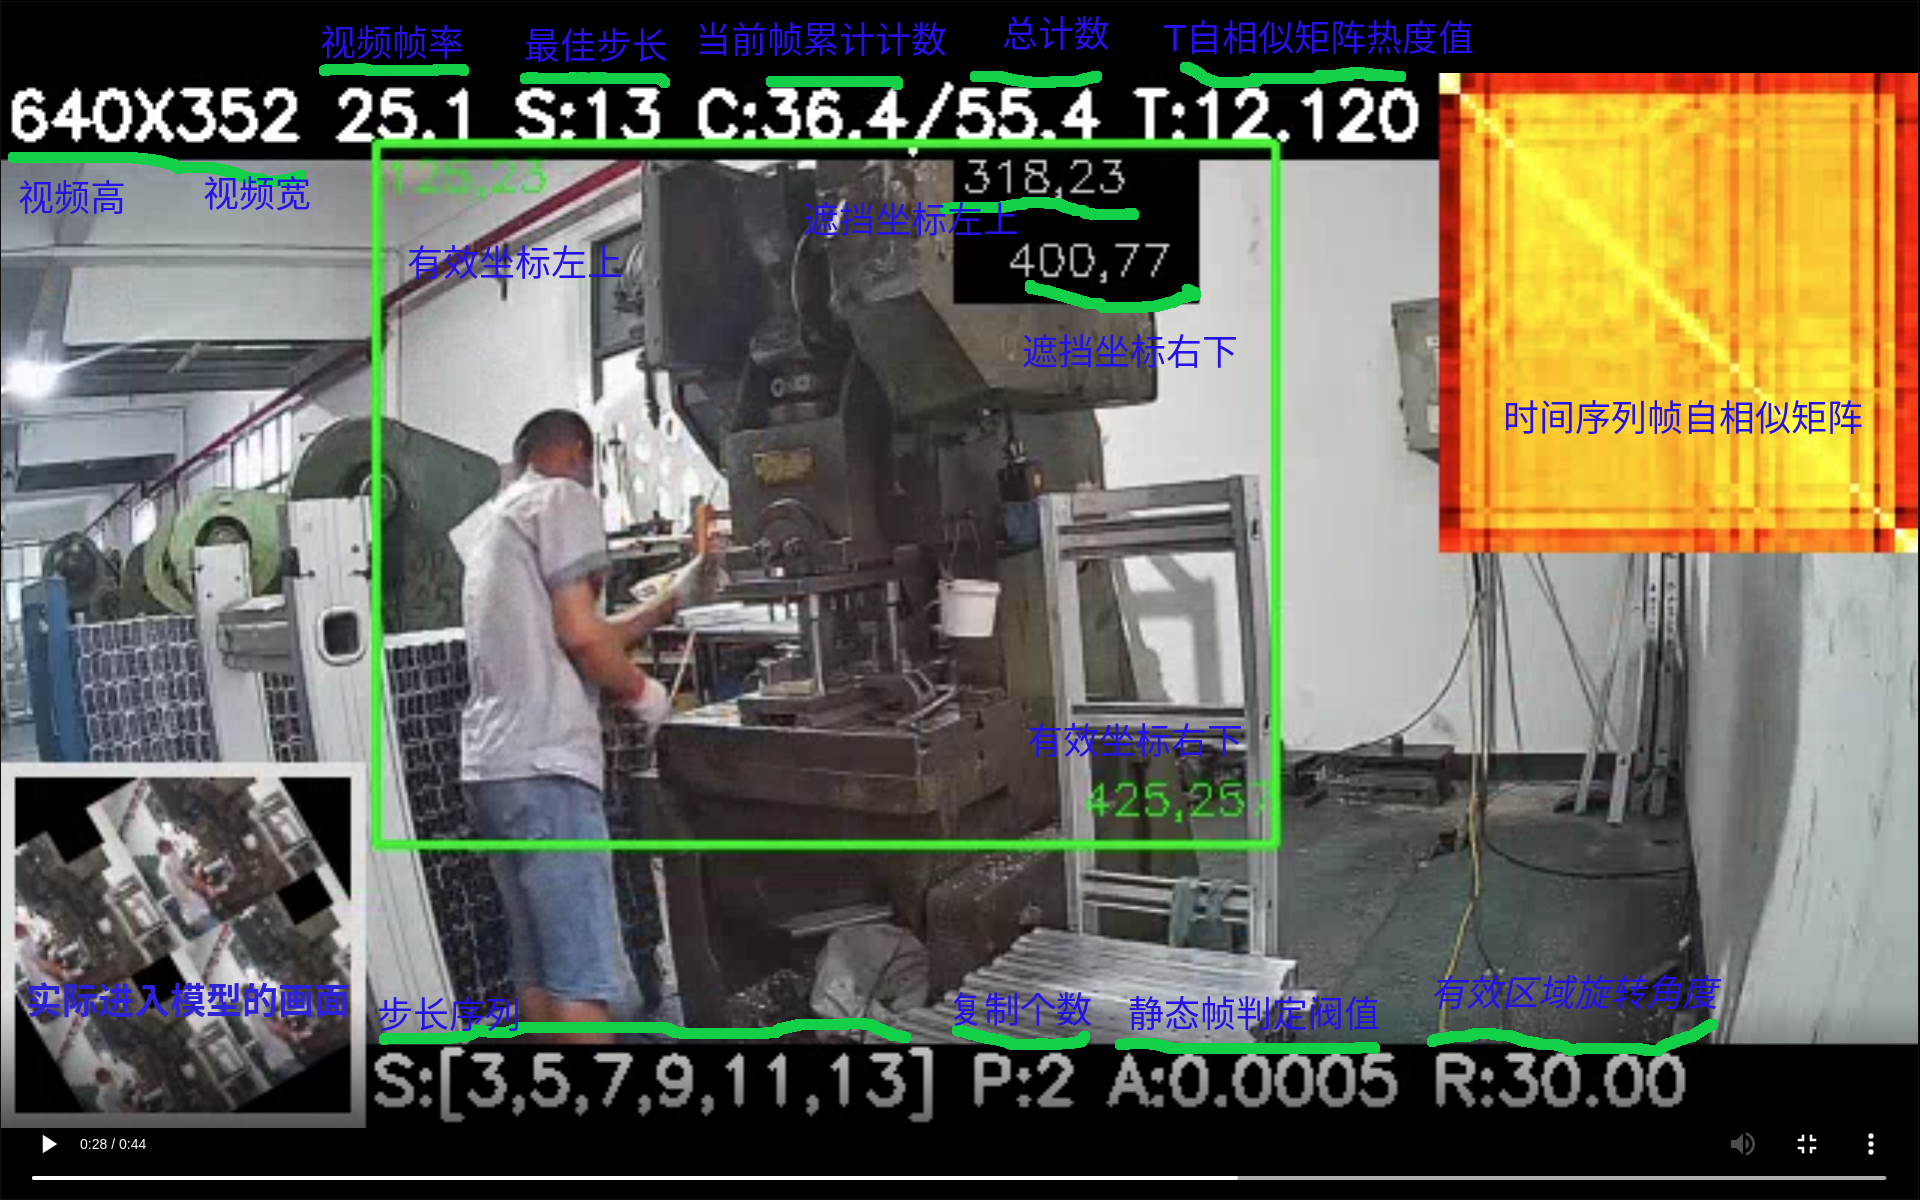

In [8]:
show_image('./调试画面介绍.png')